<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/ESAA_0506_%EA%B3%BC%EC%A0%9C_%ED%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실전 텍스트 분석하기: 단어빈도분석, 연관단어분석

1. 단어빈도분석: 문서에서 단어의 출현 빈도 계산하기

1.1 샘플 데이터 불러오기


In [1]:
# 기사본문을 저장할 리스트를 생성합니다.
article_list = []

# 기사가 저장된 파일은 data 폴더 안에 저장되어 있습니다.
file_path = "/content/drive/MyDrive/article_sample.txt"

# 기사가 저장된 파일을 불러옵니다.
f = open(file_path, encoding="utf-8")
for line in f:
    col = line.strip().split("\t")
    #group = col[0]
    #source = col[1]
    #datetime = col[2]
    #title = col[3]
    # 기사의 본문만 가져와 리스트에 저장합니다.
    content = col[4]
    article_list.append(content)
f.close()

print("총 기사 수 :", len(article_list))

총 기사 수 : 100


In [2]:
print("기사샘플 :")
print(article_list[3][:1000])

기사샘플 :
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

1.2 기사 문장을 형태소 단위로 분리하기

In [3]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,037 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,371 kB]
Get:13 http://security.ubuntu

E: Package 'python-dev' has no installation candidate


In [4]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [5]:
# 꼬꼬마 형태소 분석기를 불러옵니다.
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [6]:
# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.
tag_sentence_list = []

# 불용어를 리스트를 정의합니다.
stop_list = ["카페", "카페규정"]

# 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성합니다.
pos_list = ["NNG", "NNP"]

now = 0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

1.3 형태소 단위로 출현빈도 카운트하기

In [7]:
# 단어와 빈도를 쌍으로 저장할 딕셔너리를 생성합니다.
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        # 단어가 word_frequency의 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
word_count = []
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

# 단어의 빈도 상위 N개를 출력합니다.
for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

금융	873
금리	797
비트	554
부동산	519
대출	505
은행	384
기준	265
시장	190
화폐	185
자산	174
투자	170
당국	149
암호	148
신탁	133
그림자	133
기자	130
거래	120
신용	116
관련	107
정부	103


1.4 단어빈도를 활용해 워드클라우드 그리기

In [8]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [9]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tag_sentence in tag_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

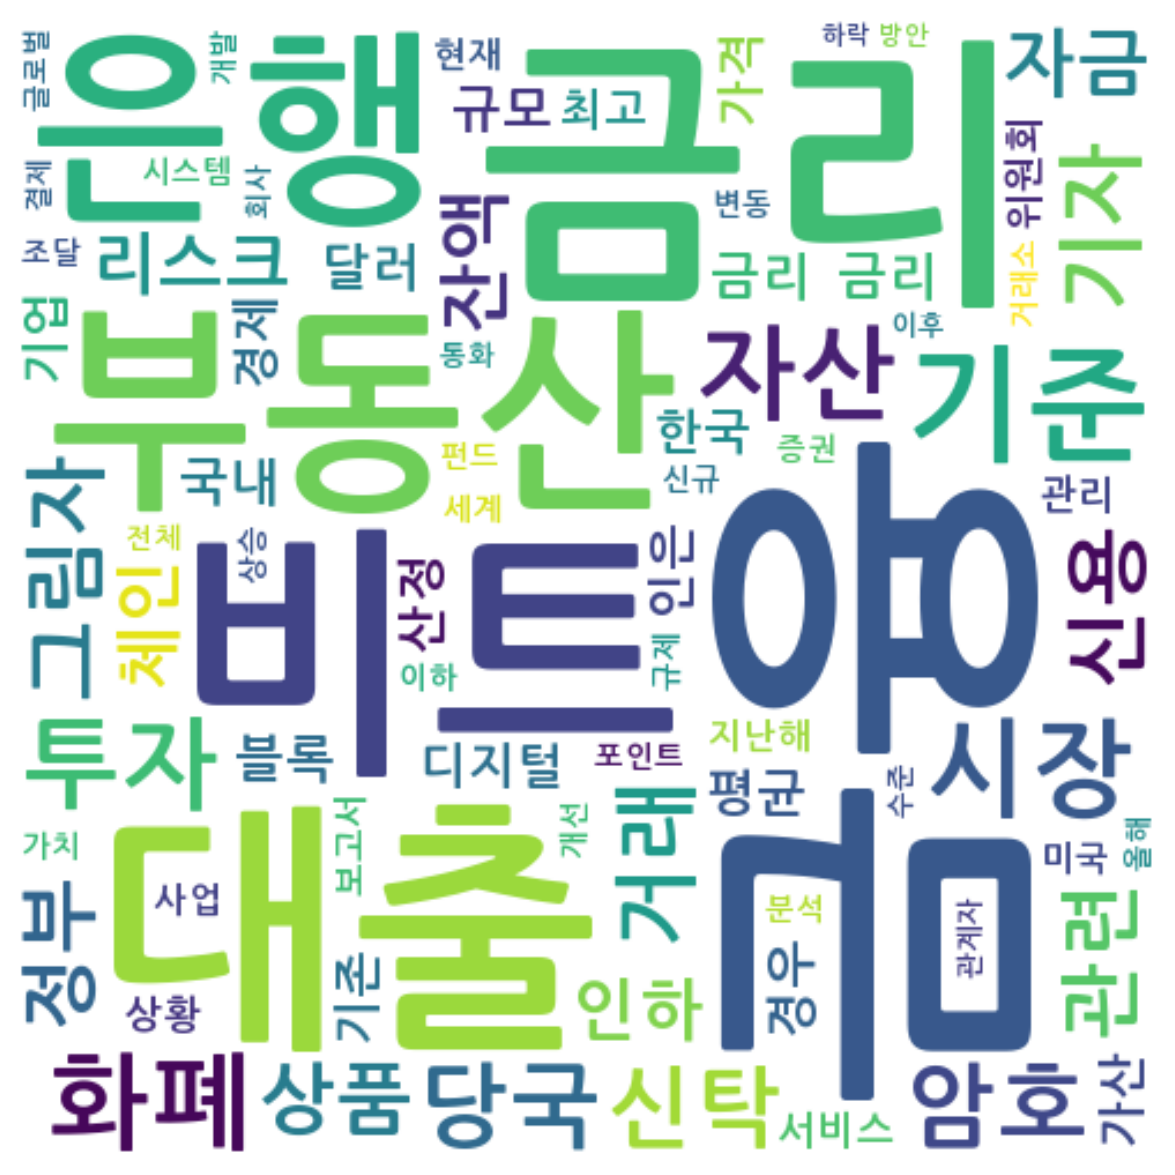

In [17]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path = '/content/drive/MyDrive/NanumGothicCoding-Bold.ttf' #폰트 - 코랩 데이터셋 폴더 내에 해당 글꼴 복사해줘야 정상 실행 가능
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 2. 연관어 분석: 문서에서 단어 사이의 동사출현빈도 계산하기

2.3 단어기준으로 주변단어 출현빈도 카운트하기
 - 2.1,2.2 과정은 1.1,1.2 과정과 동일하므로 생략

In [18]:
# 연관어를 알아볼 키워드를 지정합니다.
# 키워드는 문서에 반드시 포함된 단어만 지정해야합니다.
keyword = "금리"

# 연관단어와 그 출현빈도를 저장할 딕셔너리를 생성합니다.
co_frequency = {}

for tag_sentence in tag_sentence_list:
    if keyword not in tag_sentence:
        continue
    index = tag_sentence.index(keyword)
    # 연관단어의 정의을 keyword 앞, 뒤의 3단어까지 포함된 단어로 지정합니다.
    window = 3
    co_word_list = tag_sentence[index-window:index+window+1]
    for word in co_word_list:
        # 단어가 co_frequency 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in co_frequency.keys():
            co_frequency[word] += 1
        else:
            co_frequency[word] = 1

# co_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
co_word_list = []
for i, j in co_frequency.items():
    co_word_list.append((i, j))
co_word_list.sort(key=lambda elem: elem[1], reverse=True)

# 연관단어의 빈도 상위 N개를 출력합니다.
for word, frequency in co_word_list[:10]:
    print(word + "\t" + str(frequency))

금리	35
은행	11
기준	10
대출	9
금융	6
최고	5
당국	3
상품	3
신용	3
가능	2


2.4 연관단어의 동시출현빈도를 활용해 워드클라우드 그리기

In [19]:
# 워드클라우드를 그리기 위해 wordcloud 패키지를 설치합니다.

#pip install wordcloud

In [20]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [21]:
# 추출한 연관단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
noun_list = []
for word, frequency in co_word_list[:10]:
    for i in range(frequency):
        noun_list.append(word)

# wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
# 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
# random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
import random
random.shuffle(noun_list)

for word in noun_list:
    noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

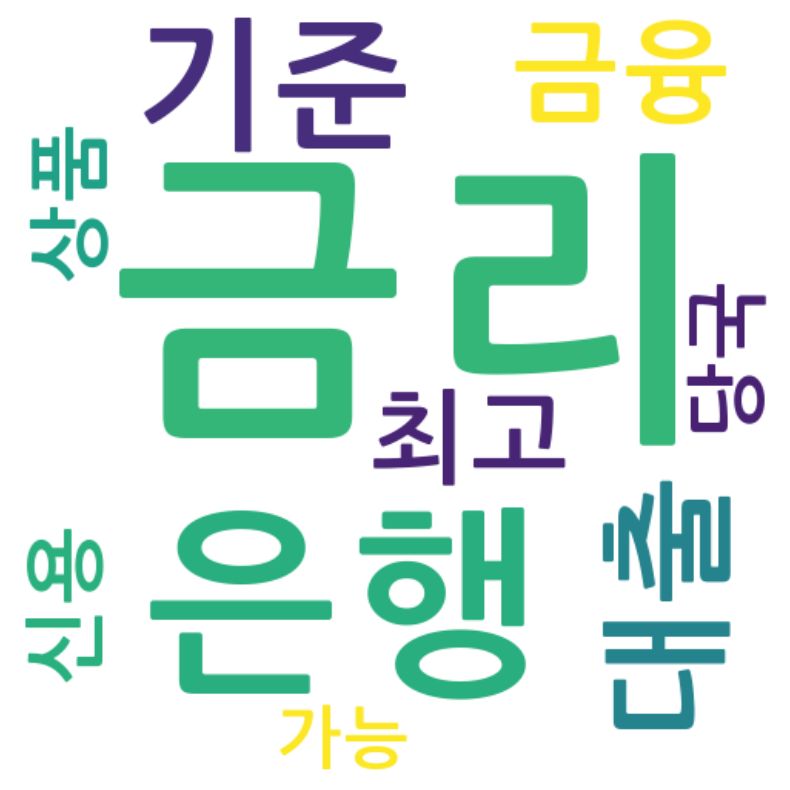

In [22]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path= '/content/drive/MyDrive/NanumGothicCoding-Bold.ttf'  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=20              #최소 글자 크기
max_font_size=200             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#  실전 텍스트 분석하기: LDA토픽모델링, 감성분석

1. LDA토픽모델링: 단어를 문서에 포함된 주제단위로 군집화하기

1.1 샘플 데이터 불러오기

In [23]:
# 기사본문을 저장할 리스트를 생성합니다.
article_list = []

# 기사가 저장된 파일은 data 폴더 안에 저장되어 있습니다.
file_path = '/content/drive/MyDrive/article_sample.txt'

# 기사가 저장된 파일을 불러옵니다.
f = open(file_path, encoding="utf-8")
for line in f:
    col = line.strip().split("\t")
    #group = col[0]
    #source = col[1]
    #datetime = col[2]
    #title = col[3]
    # 기사의 본문만 가져와 리스트에 저장합니다.
    content = col[4]
    article_list.append(content)
f.close()

print("총 기사 수 :", len(article_list))

총 기사 수 : 100


In [24]:
print("기사샘플 :")
print(article_list[3][:1000])

기사샘플 :
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

1.2 기사 문장을 형태소 단위로 분리하

In [25]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only availabl

E: Package 'python-dev' has no installation candidate


In [26]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [27]:
# 꼬꼬마 형태소 분석기를 불러옵니다.
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [28]:
# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.
tag_sentence_list = []

# 불용어를 리스트를 정의합니다.
stop_list = ["카페", "카페규정"]

# 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성합니다.
pos_list = ["NNG", "NNP"]

now = 0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

1.3 LDA토픽모델링 수행하기

In [29]:
# 텍스트 분석을 위한 다양한 기능을 제공하는 gensim 패키지를 설치합니다.

!pip install gensim

In [30]:
# gensim 패키지를 불러옵니다.
import gensim
from gensim import corpora

# LDA토픽모델링 수행중에는 진행중인 상황에 대한 로그가 출력됩니다.
# 아래 7~9번째 줄을 주석처리하면 로그를 확인할 수 있습니다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [31]:
# 추출할 토픽의 개수를 지정합니다.
topic = 3
# 각 토픽에 포함할 키워드(단어) 개수를 지정합니다.
keyword = 10

# LDA토픽모델링을 수행합니다.
dictionary = corpora.Dictionary(tag_sentence_list)
corpus = [dictionary.doc2bow(text) for text in tag_sentence_list]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)

# 추출된 토픽과 토픽에 포함된 키워드를 저장할 리스트를 생성합니다.
topic_list = []

# 추출된 토픽을 리스트에 저장합니다.
for num in range(topic):
    topic_list.append(ldamodel.show_topic(num, keyword))

In [32]:
# 추출된 토픽을 출력합니다.
for index in range(len(topic_list)):
    print("# 주제", index + 1)
    for topic in topic_list[index]:
        print("\t", topic[0].split("/")[0])

# 주제 1
	 금리
	 대출
	 금융
	 은행
	 기준
	 당국
	 인하
	 신탁
	 잔액
	 부동산
# 주제 2
	 비트
	 금융
	 자산
	 화폐
	 거래
	 디지털
	 암호
	 서비스
	 은행
	 거래소
# 주제 3
	 부동산
	 금융
	 비트
	 투자
	 그림자
	 화폐
	 시장
	 암호
	 관련
	 규모


1.4 LDA토픽모델링 결과 시각화하기

In [33]:
# LDA토픽모델링 결과를 시각화하는 pyLDAvis 패키지를 설치합니다.

!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.1 MB/s eta 0:00:00


In [34]:
# pyLDAvis 패키지를 불러옵니다.
import pyLDAvis.gensim

# LDA토픽모델링 시각화 결과를 출력합니다.
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

# Intertopic Distance Map의 각 주제가 겹치지 않고 잘 구분되면 적절한 토픽개수라고 볼 수 있습니다.
# 그래프의 분포를 확인하며 토픽의 개수를 조정합니다.
# LDA토픽모델링은 분석 수행시마다 매번 결과가 달라집니다.

2. 감성분석: 문장의 감성수준을 수치로 표현하기

2.1 샘플 데이터 가져오기

In [35]:
# 영화리뷰을 저장할 리스트를 생성합니다.
review_list = []

# 리뷰가 저장된 파일은 data 폴더 안에 저장되어 있습니다.
# 본 자료에서 제공하는 리뷰는 2019년 개봉작 "엑스맨: 다크 피닉스"의 리뷰입니다.
file_path = "/content/drive/MyDrive/review_sample.txt.txt의 사본"
# 리뷰가 저장된 파일을 불러옵니다.
f = open(file_path, encoding="utf-8")
for line in f:
    review_text = line.strip()
    review_list.append(review_text)
f.close()

print("총 리뷰 수 :", len(review_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


총 리뷰 수 : 1000


In [36]:
print("리뷰샘플 :")
print(review_list[10])

리뷰샘플 :
이게 마지막이라고?? 정말?? 이렇게 끝낸다고??


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.2 리뷰 문장을 형태소 단위로분리하기

In [37]:
# 꼬꼬마 형태소 분석기를 불러옵니다.
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.
tag_sentence_list = []

# 불용어를 리스트를 정의합니다.
stop_list = ["카페", "카페규정"]

now = 0
for review in review_list:
    now += 1
    print(now, end="\r")
    tag_list = kkma.pos(review)
    tag_sentence = []
    for word, pos in tag_list:
        tag_sentence.append(word + "/" + pos)
    tag_sentence_list.append(tag_sentence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print("리뷰 형태소분석 샘플 :")
print("- 원문 :", review_list[10])
print("- 결과 :", tag_sentence_list[10])

리뷰 형태소분석 샘플 :
- 원문 : 이게 마지막이라고?? 정말?? 이렇게 끝낸다고??
- 결과 : ['이것/NP', '이/JKS', '마지막/NNG', '이/VCP', '라고/ECD', '??/SW', '정말/MAG', '??/SW', '이렇/VA', '게/ECD', '끝내/VV', 'ㄴ다고/ECE', '??/SW']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.3 감성사전 불러오기

In [40]:
# KOSAC 감성사전의 내용을 살펴봅니다.
f = open("/content/drive/MyDrive/polarity.csv.csv의 사본", encoding="utf-8")
for line in f.read().split("\n")[:10]:
    line = line.strip().split(",")
    print(line)
f.close()

['ngram', 'freq', 'COMP', 'NEG', 'NEUT', 'None', 'POS', 'max.value', 'max.prop']
['가*/JKS', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/JKS;있/VV', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/JKS;있/VV;었/EP', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/VV', '3', '0', '0', '0', '0', '1', 'POS', '1']
['가*/VV;ㄴ다*/EF', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가/JKC', '17', '0', '0.470588235', '0.235294118', '0', '0.294117647', 'NEG', '0.470588235']
['가/JKC;되/VV', '11', '0', '0.363636364', '0.272727273', '0', '0.363636364', 'NEG', '0.363636364']
['가/JKC;되/VV;ㄴ/ETM', '2', '0', '0', '1', '0', '0', 'NEUT', '1']
['가/JKC;되/VV;ㄹ/ETM', '1', '0', '0', '1', '0', '0', 'NEUT', '1']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# KOSAC 감성사전을 불러와 딕셔너리에 저장합니다.
# 원본 사전에 세미콜론(;)으로 구분된 형태소를 띄어쓰기 단위로 변형하여 딕셔너리의 키(key)값으로 활용합니다.

# 사전을 저장할 딕셔너리를 생성합니다.
sentiment = {}

f = open("/content/drive/MyDrive/polarity.csv.csv의 사본", encoding="utf-8")
for line in f:
    col = line.strip().split(",")
    pos = col[0]
    polarity = col[7]
    score = col[8]
    # 극성이 POS인 경우 +, NEG인 경우 -를 곱해 스코어(score)를 계산합니다.
    if polarity == "POS":
        score = float(score)
    elif polarity == "NEG":
        score = -float(score)
    else:
        # 긍정 또는 부정인 경우만 취급합니다.
        continue
    # 세미콜론(;)을 띄어쓰기로 바꿔 딕셔너리에 스코어와 함께 저장합니다.
    sentiment[pos.replace(";", " ")] = score

f.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# 생성한 감성사전 딕셔너리 샘플을 출력합니다.

# 긍정
print("(긍정) 솜씨/NNG 는/JX 능숙/XR :", sentiment["솜씨/NNG 는/JX 능숙/XR"])
print("(긍정) 자연/NNG 스럽/XSA :", sentiment["자연/NNG 스럽/XSA"])
print("(긍정) 획일/XR 성/XSN 의/JKG :", sentiment["획일/XR 성/XSN 의/JKG"])
print("(긍정) 훨씬/MAG 안전/NNG :", sentiment["훨씬/MAG 안전/NNG"])
# 부정
print("(부정) 뒷맛/NNG 이/JKS 씁쓸/XR :", sentiment["뒷맛/NNG 이/JKS 씁쓸/XR"])
print("(부정) 손해/NNG 배상/NNG 을/JKO :", sentiment["손해/NNG 배상/NNG 을/JKO"])
print("(부정) 에서/JKB 욕/NNG 튀어나오/VV :", sentiment["에서/JKB 욕/NNG 튀어나오/VV"])
print("(부정) 유달리/MAG 난해/XR :", sentiment["유달리/MAG 난해/XR"])

(긍정) 솜씨/NNG 는/JX 능숙/XR : 1.0
(긍정) 자연/NNG 스럽/XSA : 1.0
(긍정) 획일/XR 성/XSN 의/JKG : 1.0
(긍정) 훨씬/MAG 안전/NNG : 1.0
(부정) 뒷맛/NNG 이/JKS 씁쓸/XR : -1.0
(부정) 손해/NNG 배상/NNG 을/JKO : -1.0
(부정) 에서/JKB 욕/NNG 튀어나오/VV : -1.0
(부정) 유달리/MAG 난해/XR : -1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.4 리뷰 감성스코어 계산하

In [43]:
# 감성분석 결과를 긍정과 부정 리뷰로 각각 저장할 리스트를 생성합니다.
positive_sentence = []
negative_sentence = []

for tag_sentence, review in zip(tag_sentence_list, review_list):
    # 스코어를 0점으로 초기화합니다.
    score = 0.0
    # 형태소분석된 문장 안에서 최대 7개까지 결합된 형태소가 감성사전 안에 있는지 확인합니다.
    for i in range(len(tag_sentence)):
        max_n = 7
        for n in range(max_n):
            ngram = ""
            for j in range(len(tag_sentence)-n):
                ngram += " " + tag_sentence[j]
            ngram = ngram.strip()
            if ngram in sentiment.keys():
                score += sentiment[ngram]
    # 감성스코어로 긍정 또는 부정을 판단하기위한 임계값을 지정합니다.
    limit = 0
    if score > limit:
        positive_sentence.append(["POSITIVE", str(review)])
    elif score < -limit:
        negative_sentence.append(["NEGATIVE", str(review)])

# 감성분석 결과를 감성스코어를 기준으로 정렬합니다.
positive_sentence.sort(reverse=True)
negative_sentence.sort()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.5 리뷰 감성분석 결과 확인하기

In [44]:
print("긍정판별 문장 개수 :", len(positive_sentence))
positive_sentence[:10]

긍정판별 문장 개수 : 27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['POSITIVE', '흥미진진 마지막액션씬최고'],
 ['POSITIVE', '하루빨리 통합마블 되기를'],
 ['POSITIVE', '최고최고최고최고최고!'],
 ['POSITIVE', '최고ㅜㅜ 레이븐ㅠㅠㅠ'],
 ['POSITIVE', '장난합니까 마지막 영환데'],
 ['POSITIVE', '은혜를 모르는 진 그레이..'],
 ['POSITIVE', '영화보는데 기빨린다 후하'],
 ['POSITIVE', '영화를 만들다 말았어...'],
 ['POSITIVE', '아주 재밌습니다 후회없음'],
 ['POSITIVE', '생각보다 많이 괜찮은 영화']]

In [45]:
print("부정판별 문장 개수 :", len(negative_sentence))
negative_sentence[:10]

부정판별 문장 개수 : 13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['NEGATIVE', '계속 생각 나는 영화. ㅠㅠ'],
 ['NEGATIVE', '그냥 개똥보다 못한 영화'],
 ['NEGATIVE', '난재밌었어요....'],
 ['NEGATIVE', '내 개인 평점 7.2..;;'],
 ['NEGATIVE', '말이 필요없습니다. 재미있어요'],
 ['NEGATIVE', '스토리 너무 늘어지는듯'],
 ['NEGATIVE', '스토리가 왜이리 이상하냐'],
 ['NEGATIVE', '아쉬움가득안고떠납니다'],
 ['NEGATIVE', '아쉽지만 행복했습니다'],
 ['NEGATIVE', '왜 엑스우먼이 아닌지ㅎ']]